# Trapping Rain Water
---

**Problem Description**

Given *n* non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it is able to trap after raining.

In [1]:
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
def _get_row_count(row):
    """
    Helper function for row-by-row count function (i.e. axis == 0).
    Counts the number of water units for a given row.
    Returns an integer representing the number of water units in that row.
    """
    indexes = np.argwhere(row == 1)
    count = 0
    if len(indexes) > 1:
        # we know that two points separated by at least one zero will collect water
        # since the separation indicates a decrease in height in that position
        for i in range(len(indexes)-1):
            count += indexes[i+1][0] - indexes[i][0] - 1
    
    return count


def count_trapped_water(elevation_map, axis=1):
    """
    Counts the number of water units that will be trapped given the elevation map.
    Returns a list where each value corresponds to the number of water units
    that will be trapped in that index of the elevation map given the axis.
    """
    msg = 'Elevation map must contain all non-negative integers'
    assert all(map(lambda x: type(x) is int and x >= 0, elevation_map)), msg
    
    if axis == 0:
        # start off with all zeroes
        grid = np.zeros((len(elevation_map), max(elevation_map)))
        # mark indexes as 1 up to and including the height
        for index in range(len(elevation_map)):
            grid[index, :elevation_map[index]] = 1
        if grid.shape[1]:
            water_units = np.apply_along_axis(_get_row_count, axis=0, arr=grid)
        else:
            water_units = []

    if axis == 1:
        leader = elevation_map[0]
        water_units = []
        for index in range(1, len(elevation_map)-1):
            height = elevation_map[index]
            max_height_remainder = max(elevation_map[index+1:])
            # if the greatest subsequent height is less than the current height
            # then water units will all subsequently be a difference between
            # that greatest subsequent height and the height being measured
            if max_height_remainder < height:
                leader = max_height_remainder
                water_units.append(0)
                continue
            if height > leader:
                leader = height
                water_units.append(0)
            else:
                water_units.append(leader - height)
        # add 0 to both ends of list to account for first and last units
        water_units = [0] + water_units + [0]

    return water_units


def visualize_trapped_water(elevation_map, predictions):
    """
    Plot the elevation map and units of water.
    Returns None.
    """
    predicted_plot = [x+y for x,y in zip(predictions, elevation_map)]
    plt.figure(figsize=(len(elevation_map)+1, max(elevation_map)+1))
    plt.bar(range(len(elevation_map)), predicted_plot,
            width=1.0, align='edge', facecolor='blue', label='water')
    plt.bar(range(len(elevation_map)), elevation_map,
            width=1.0, align='edge', facecolor='black', label='structure')
    plt.xticks(range(len(elevation_map)), ['' for _ in range(len(elevation_map))])
    plt.yticks(range(max(elevation_map)), ['' for _ in range(max(elevation_map))])
    plt.xlim([0, len(elevation_map)])
    plt.ylim([0, max(elevation_map)])
    plt.title('Trapped Rain Water: {} Units of Water'.format(sum(predictions)), fontsize=14)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.grid()
    plt.show()

In [3]:
tests = [
    {
        'elevation_map': [1,0,2,1,0,1,3,2,1,2,1],
        'expected': 6
    },
    {
        'elevation_map': [1,0,2,1,0,1,3,2,1,3,0],
        'expected': 8
    }, 
    {
        'elevation_map': [0,1,2,3,4],
        'expected': 0,
    },
    {
        'elevation_map': [4,3,2,1,0],
        'expected': 0
    },
    {
        'elevation_map': [4,3,0,2,1],
        'expected': 2
    },
    {
        'elevation_map': [4,3,0,2,1,4,1,1,0],
        'expected': 10
    },
    {
        'elevation_map': [1,1,1],
        'expected': 0
    },
    {
        'elevation_map': [0,0],
        'expected': 0
    },
    {
        'elevation_map': [1,0,4,0,0,4,0,1],
        'expected': 10
    }
]

Run tests to ensure that the output is as expected then visualize the elevation map and trapped rain water

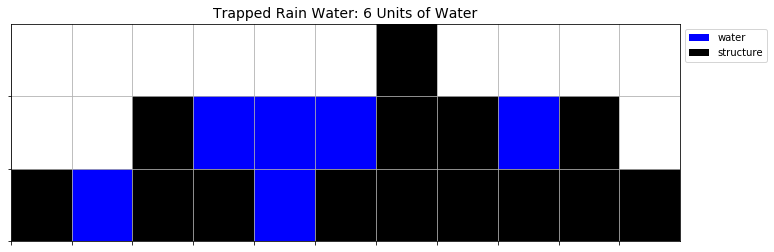

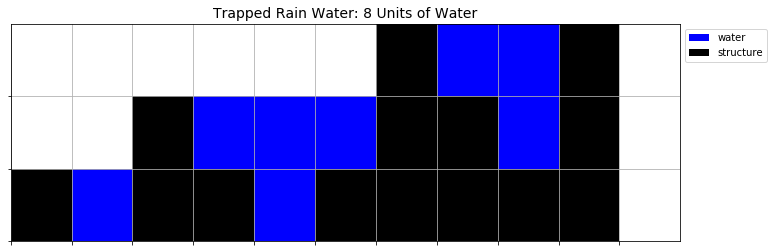

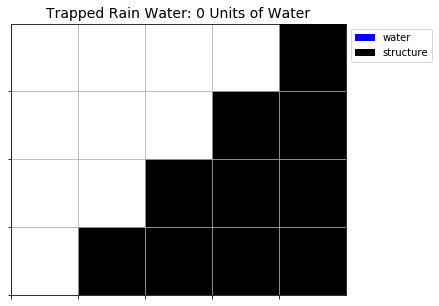

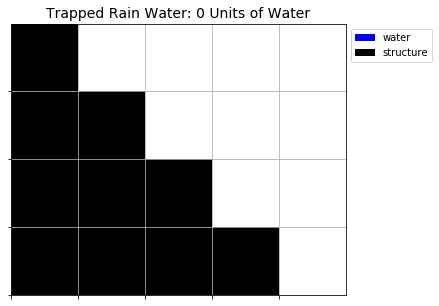

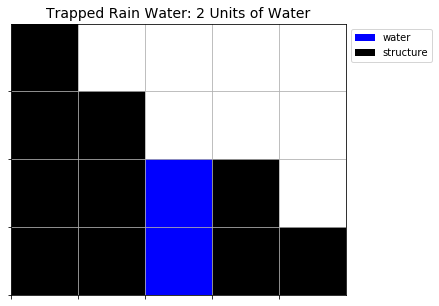

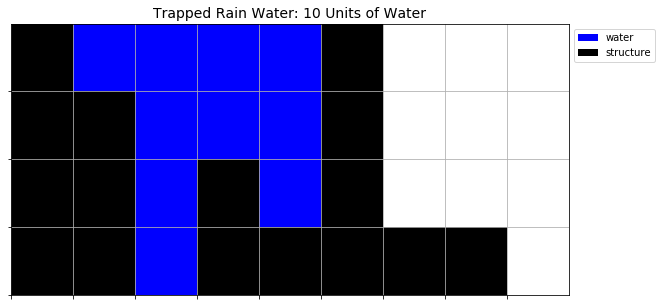

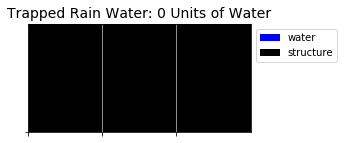

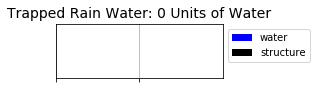

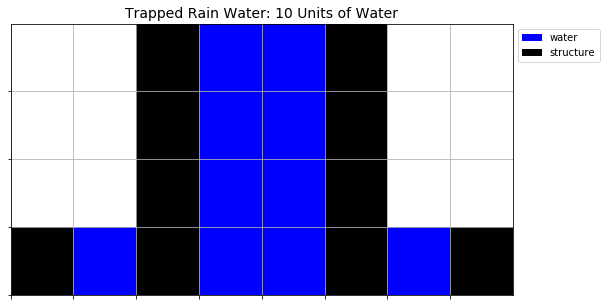

In [4]:
# funcs = {
#     'horizontal': {'func': count_trapped_water_horizontal, 'time': 0},
#     'vertical': {'func': count_trapped_water_vertical, 'time': 0}
# }

axes = {
    0: 0,
    1: 0
}

# for f in funcs:
for axis in axes:
    for test in tests:
        elevation_map, expected = test['elevation_map'], test['expected']
        start = time.time()
        predictions = count_trapped_water(elevation_map, axis=axis)
        axes[axis] += time.time() - start
        predicted_count = sum(predictions)
        msg = 'Elevation map: {}\n'.format(elevation_map)
        msg += 'Predicted: {}\nExpected: {}\n'.format(predicted_count, expected)
        assert predicted_count == expected, msg
        if axis == 1:
            visualize_trapped_water(elevation_map, predictions)
            time.sleep(1)

Compare run times for the two function types

In [7]:
msg = 'Run times\nAxis 0:\t{:.6f} seconds\n'.format(axes[0])
msg += 'Axis 1:\t{:.6f} seconds'.format(axes[1])
print(msg)

Run times
Axis 0:	0.003028 seconds
Axis 1:	0.000576 seconds
